In [2]:
!unzip -q /content/dataset2.zip

In [1]:
!nvidia-smi


Mon May 19 09:14:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = (48, 48)
batch_size = 64
data_dir = "/content/dataset2"

# Tiền xử lý và chia tập
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/dataset2/train',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

val_generator = val_datagen.flow_from_directory(
    '/content/dataset2/test',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale'
)

num_classes = train_generator.num_classes


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models

num_classes = train_generator.num_classes

model = Sequential([
    Input(shape=(48,48,1)),

    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    BatchNormalization(),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(1e-4)),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.4),
    Dense(128, activation='relu', kernel_regularizer=l2(1e-4)),
    Dropout(0.3),
    Dense(7, activation='softmax')
])

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)


model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,931,719 (22.63 MB)

 Trainable params: 5,930,823 (22.62 MB)

 Non-trainable params: 896 (3.50 KB)

In [14]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1
)

# Huấn luyện
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping, lr_scheduler]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 48s 87ms/step - accuracy: 0.2061 - loss: 2.5827 - val_accuracy: 0.2471 - val_loss: 1.9961 - learning_rate: 0.0010
Epoch 2/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.2602 - loss: 1.9538 - val_accuracy: 0.2471 - val_loss: 2.0014 - learning_rate: 0.0010
Epoch 3/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.3459 - loss: 1.7730 - val_accuracy: 0.3833 - val_loss: 1.7405 - learning_rate: 0.0010
Epoch 4/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 29s 65ms/step - accuracy: 0.4332 - loss: 1.5996 - val_accuracy: 0.5020 - val_loss: 1.4438 - learning_rate: 0.0010
Epoch 5/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.4808 - loss: 1.5026 - val_accuracy: 0.4886 - val_loss: 1.5281 - learning_rate: 0.0010
Epoch 6/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.5094 - loss: 1.4405 - val_accuracy: 0.5361 - val_loss: 1.3734 - learning_rate: 0.0010
Epoch 7/50
449/449 ━━━━━━━━━━━━━━━━━━━━ 27s 61ms/step - accuracy: 0.5256 - loss: 1.4092

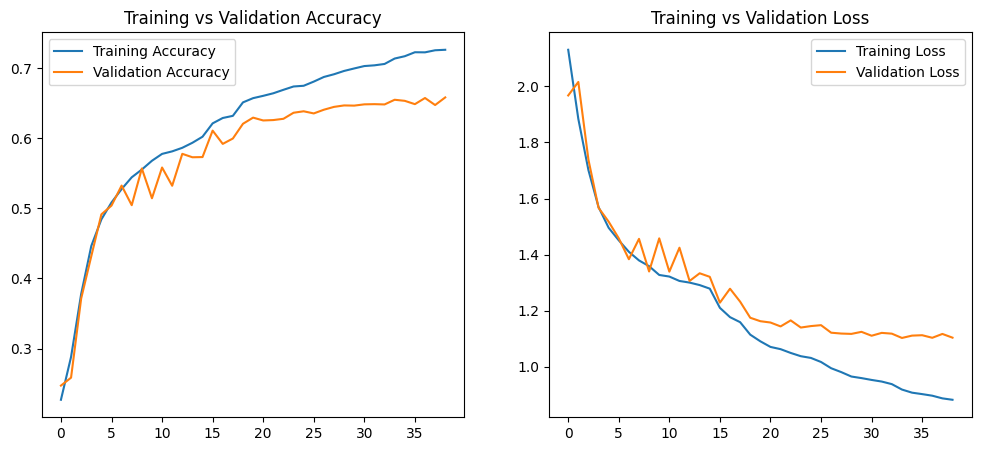

In [7]:
import matplotlib.pyplot as plt # Add this line at


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [15]:
model.save('/content/emotionClassifierModel.h5')

In [9]:
test_loss, test_accuracy = model.evaluate(val_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

113/113 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.6606 - loss: 1.1146
Test Accuracy: 65.31%
Test Loss: 1.1142


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step


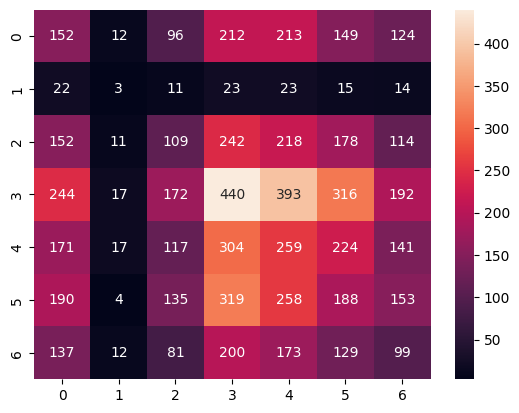

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,f1_score,accuracy_score
import seaborn as sns
import numpy as np
y_true = val_generator.classes
y_pred_prob = model.predict(val_generator)
y_pred = np.argmax(y_pred_prob,axis=1)


cfs_mt = confusion_matrix(y_true, y_pred)

plt.figure()

sns.heatmap(cfs_mt, annot = True, fmt = 'd')

plt.show()
# 0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral

Saving download.jpg to download.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 959ms/step
Predicted: sad (92.81%)


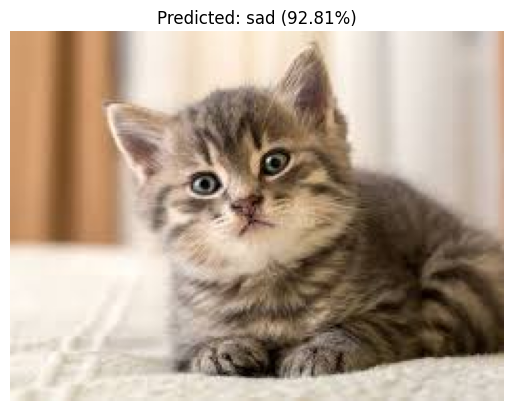

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files
from PIL import Image

uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=image_size)
    img = tf.image.rgb_to_grayscale(img)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_label = list(train_generator.class_indices.keys())[class_idx]
    confidence = prediction[0][class_idx]

    print(f"Predicted: {class_label} ({confidence*100:.2f}%)")

    # Hiển thị ảnh đã chọn và dự đoán
    img_display = Image.open(img_path)
    plt.imshow(img_display)
    plt.title(f"Predicted: {class_label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()
